# Tutorial 5

## Exercise 2: The 2D heat equation

Let's import some libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

We want to solve the 2D heat equation:
    $$ \frac{\partial}{\partial t} u(t,x,y) = \Delta u(t,x,y). \tag{1}$$
    
This is a [partial differential equation](https://en.wikipedia.org/wiki/Partial_differential_equation), since $u$ is dependent on both time $t$ and the spatial variables $(x,y)$ and $u$ has a first-order derivative w.r.t $t$ on the left-hand side, and a second-order derivative w.r.t $(x,y)$ on the right.

When we worked on our oscillator problem, we only had one first-order derivative w.r.t $t$ and in this case, we needed only an *initial condition*. Now as we are dealing with spatial derivatives, we also need a set of *boundary conditions* and a *spatial grid*.

For the initial condition, we take
$$ u^0 = \exp(-r^2), $$
where $r = \sqrt{x^2 + y^2}$.

To define the spatial grid, we take $x \in [-4,4]$ and $y \in [-4,4]$. Finally, we say that $u$ is periodic both $x$ and $y$.

### The 1D problem
In 1D, the problem is somewhat easier:
    $$ \frac{\partial}{\partial t} u(t,x) = \frac{\partial^2 }{\partial x^2} u(t,x), \tag{2} $$
    $$ u^0 = \exp(-x^2), $$
with $x \in [-4,4]$, so we first try to deal with this 1D problem. 

We learnt how to discretise a problem in time. Now let's apply what we learnt:
1. Can you discretise the left-hand side of equation (2) with the [explicit midpoint method](https://en.wikipedia.org/wiki/Midpoint_method)?
2. We want second-order schemes in both time and space. The explicit midpoint method is a second-order time-integrator. We want to use the second-order [central difference method](https://en.wikipedia.org/wiki/Finite_difference#Higher-order_differences) for spatial discretisation. Can you discretise the right-hand side of (2) with this method?
3. Now what are the components that you need to implement this problem? (List them out)
4. Implement the components... see what works and what doesn't.

**Try to use slicing, broadcasting, and vectorisation as you code!**

[[1.26641655e-14 2.79041771e-14 6.02665001e-14 ... 6.02665001e-14
  2.79041771e-14 1.26641655e-14]
 [2.79041771e-14 6.14839641e-14 1.32790991e-13 ... 1.32790991e-13
  6.14839641e-14 2.79041771e-14]
 [6.02665001e-14 1.32790991e-13 2.86797501e-13 ... 2.86797501e-13
  1.32790991e-13 6.02665001e-14]
 ...
 [6.02665001e-14 1.32790991e-13 2.86797501e-13 ... 2.86797501e-13
  1.32790991e-13 6.02665001e-14]
 [2.79041771e-14 6.14839641e-14 1.32790991e-13 ... 1.32790991e-13
  6.14839641e-14 2.79041771e-14]
 [1.26641655e-14 2.79041771e-14 6.02665001e-14 ... 6.02665001e-14
  2.79041771e-14 1.26641655e-14]]


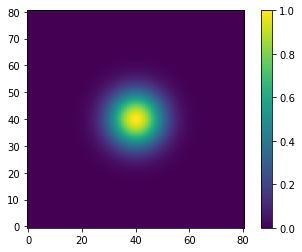

In [105]:
xmin = -4
xmax = +4
dx = 0.1
xh = np.arange(xmin,xmax+dx,dx)
yh = np.copy(xh).reshape(1,-1)

xh = xh.reshape(-1,1)
z = np.exp(-(xh**2+yh**2))
z = (np.random.random((81,81))-0.5)*2.0
# z = np.zeros_like(z)
x = np.exp(-xh**2)
y = np.copy(x)

x = x.reshape(-1,1)
y = y.reshape(1,-1)

# print(x.shape)
# print(y.shape)

z = x * y
# print(z.shape)

plt.figure()
plt.imshow(z, origin='lower')
plt.colorbar()
plt.show()

In [29]:
def boundary_handling(z):
    # periodic boundary conditions
    z = np.pad(z, ((1,1),(0,0)), mode='wrap')
    return z

In [76]:
print(z[:-2,:].shape)
print(z[2:,:].shape)
print(z[1:-1,:].shape)

def c_diff(z,dx):
    dzdx =  z[:-2,:] - 2.0*z[1:-1,:] + z[2:,:]
    return dzdx / dx**2

(79, 81)
(79, 81)
(79, 81)


### The 2D problem
Now that we have the 1D solution of the heat equation, 
1. Can you discretise the right-hand of (1) in 2D? Hint: You will obtain the famous [5-point stencil](https://en.wikipedia.org/wiki/Five-point_stencil) for the [Laplace operator](https://en.wikipedia.org/wiki/Laplace_operator).
2. Now, the challenge is to solve the 2D heat equation by changing your 1D code *as little as possible*. Can you do that?

In [77]:
dt = 0.001
T = 1.0
t = np.arange(0.0,T+dt,dt)
print(t)

zn = np.copy(z)
sol = np.zeros((len(t),len(xh),len(xh)))

def space_update(z,dx):
    z_xbc = boundary_handling(z)
    d2zdx2 = c_diff(z_xbc, dx)
    z_y = np.moveaxis(z,0,-1)
    z_ybc = boundary_handling(z_y)
    d2zdy2 = c_diff(z_ybc, dx)
    d2zdy2 = np.moveaxis(d2zdy2, 0, -1)
    return d2zdx2 + d2zdy2

for idx, _ in enumerate(t):
    fz = space_update(zn,dx)
    midpt = zn + 0.5 * dt * fz
    fz = space_update(midpt,dx)
    zn = zn + dt * fz
    sol[idx] = zn

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


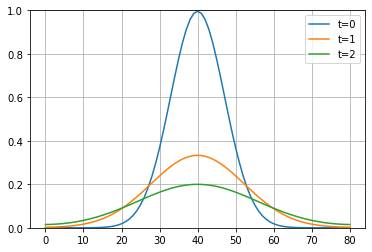

In [78]:
plt.figure()
plt.plot(sol[0,40], label='t=0')
plt.plot(sol[int(len(t)/2),40], label='t=1')
plt.plot(sol[-1,40], label='t=2')
plt.ylim([0,1])
plt.legend()
plt.grid()
plt.show()

Below is a code snippet that saves your solution as an animation.

IndexError: index 1001 is out of bounds for axis 0 with size 1001

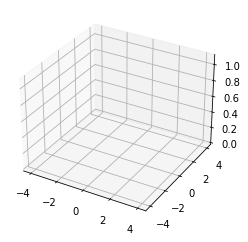

In [36]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(xh,xh)
plot = [ax.plot_surface(X, Y, sol[0,:,:], color='1.0', rstride=1, cstride=1, cmap="magma")]

def update_plot(i, sol, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, sol[i,:,:], cmap="magma")

ax.set_zlim(0,1.1)
ani = animation.FuncAnimation(fig, update_plot, 2001, fargs=(sol, plot), interval=1)
ani.save('test.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()

(81,)
[1.12535175e-07 2.47959602e-07 5.35534780e-07 1.13372714e-06
 2.35257520e-06 4.78511739e-06 9.54016287e-06 1.86437423e-05
 3.57128496e-05 6.70548243e-05 1.23409804e-04 2.22629857e-04
 3.93669041e-04 6.82328053e-04 1.15922917e-03 1.93045414e-03
 3.15111160e-03 5.04176026e-03 7.90705405e-03 1.21551783e-02
 1.83156389e-02 2.70518469e-02 3.91638951e-02 5.55762126e-02
 7.73047404e-02 1.05399225e-01 1.40858421e-01 1.84519524e-01
 2.36927759e-01 2.98197279e-01 3.67879441e-01 4.44858066e-01
 5.27292424e-01 6.12626394e-01 6.97676326e-01 7.78800783e-01
 8.52143789e-01 9.13931185e-01 9.60789439e-01 9.90049834e-01
 1.00000000e+00 9.90049834e-01 9.60789439e-01 9.13931185e-01
 8.52143789e-01 7.78800783e-01 6.97676326e-01 6.12626394e-01
 5.27292424e-01 4.44858066e-01 3.67879441e-01 2.98197279e-01
 2.36927759e-01 1.84519524e-01 1.40858421e-01 1.05399225e-01
 7.73047404e-02 5.55762126e-02 3.91638951e-02 2.70518469e-02
 1.83156389e-02 1.21551783e-02 7.90705405e-03 5.04176026e-03
 3.15111160e-03 1.

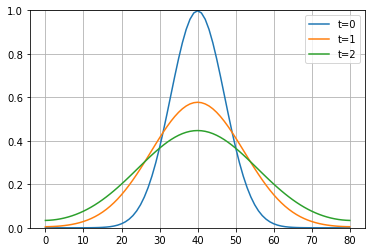

In [104]:
# spatial step-size
dx = 0.1
# temporal step-size
dt = 0.001
# simulation end time
T = 1.0
# the time axis
t = np.arange(0.0,T+dt,dt)

# your code here:
x = np.arange(-4,4+dx,dx)
print(x.shape)
# u = np.exp(-x**2).reshape(1,-1) * np.exp(-x**2).reshape(-1,1)
# sol = np.zeros((len(t),len(x),len(x)))

u = np.exp(-x**2)
sol = np.zeros((len(t),len(x)))

def bc(u):
    ghost_cells = [(0,0)]*u.ndim
    ghost_cells[0] = (1,1)
    u = np.pad(u, (ghost_cells), mode='wrap')
    return u

def rhs(u, dx):
    u = bc(u)
    lu = u[:-2,...]
    ru = u[2:,...]
    cu = u[1:-1,...]
    
    return (lu - 2.0*cu + ru) / dx**2

def fu(u, dx):
    fu = np.zeros_like(u)
    for _ in range(u.ndim):
        fu += rhs(u, dx)
        u = np.moveaxis(u, 0,-1)
        fu = np.moveaxis(fu, 0,-1)
    return fu

print(u)
print(u.shape)
for tidx, time in enumerate(t):
    unphalf = u + 0.5 * dt * fu(u, dx)
    print(unphalf)
    u[...] = u + dt * fu(unphalf, dx)
    sol[tidx] = u

# plt.figure()
# plt.plot(sol[0,40], label='t=0')
# plt.plot(sol[int(len(t)/2),40], label='t=1')
# plt.plot(sol[-1,40], '--', label='t=2')
# # plt.ylim([0,1])
# plt.legend()
# plt.grid()
# plt.show()

plt.figure()
plt.plot(sol[0], label='t=0')
plt.plot(sol[int(len(t)/2)], label='t=1')
plt.plot(sol[-1], label='t=2')
plt.ylim([0,1])
plt.legend()
plt.grid()
plt.show()

# Here is a code to check if you initialised the initial condition correctly.
# plt.figure()
# plt.imshow(u, origin='lower')
# plt.colorbar()
# plt.show()

In [91]:
# this only works for python lists, NOT numpy list
ndim = 3
A = [(0,0)] * ndim
A[0] = (1,1)
print(A)

[(1, 1), (0, 0), (0, 0)]


In [98]:
import numpy as np

In [100]:


A = np.arange(10)
print(A.reshape((1,-1)))

[[0 1 2 3 4 5 6 7 8 9]]


In [107]:
B = np.meshgrid(A,0)
print(B)

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])]
